- Name: Shah Huq 
- PSID: 2031297 
- GitHub: adyan0820

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [12]:
df = pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Task 1

In [13]:
#get statistical summary of data 
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Two of my favorite statistical measures are the mean and std. For this speciic data set the mean helps see what the average or expected quality of the wine is which as we can see from here is on average a wine is expected to be good. The standard deviation is useful because it can help us identify which variables are pretty consistent across the different wines and which variables high variability. The variables with high variability can be an indication of them being good predictors for the quality of the wine.

### Task 2

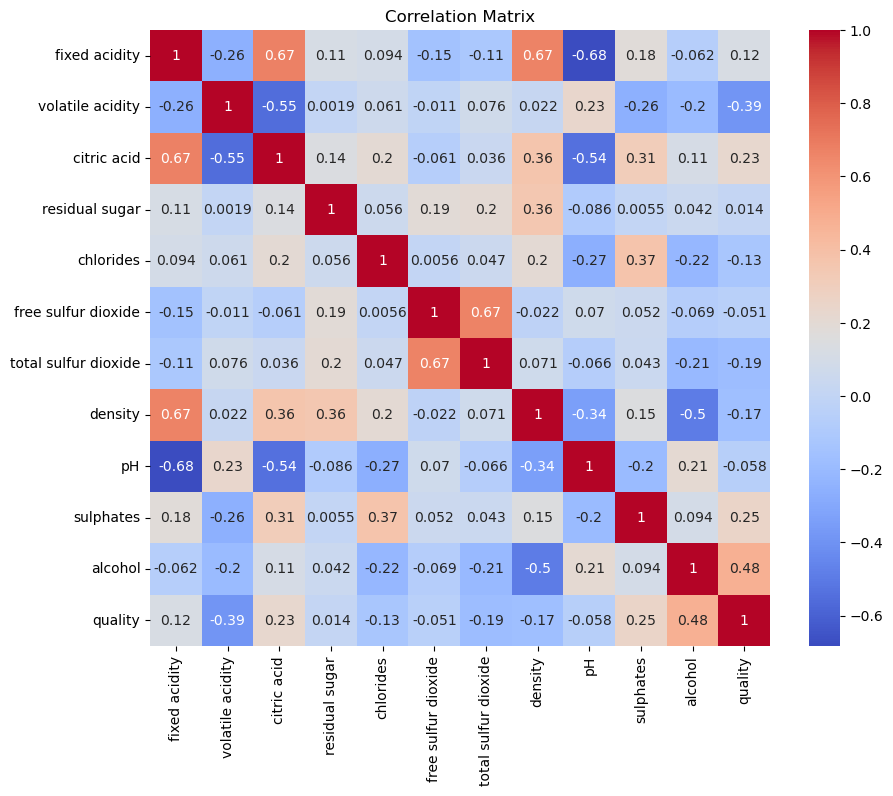

In [14]:
correlation = df.corr()


plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see that the alcohol percentage and volatile acidity show a strong correlation with the quality and could be good predictors for the quality. We can see the highest positive correlation between fixed acidity and citric acid and also between fixed acidity and density. Total sulfur dioxide and fixed sulfur dioxide also have a high correlation. The highest negative correlation can be seen between pH and fixed acidity. We can also see other high negative correlations between pH and citric acid and also between alcohol and density. These pair of attributes that have a high correlation can all be used as good predictors for each other and because of this also if we're predicting the quality then we for these pairs that have a high correlation we can possibly see similar performance by just picking one of the two variables since they could just be saying the same story.

### Task 3

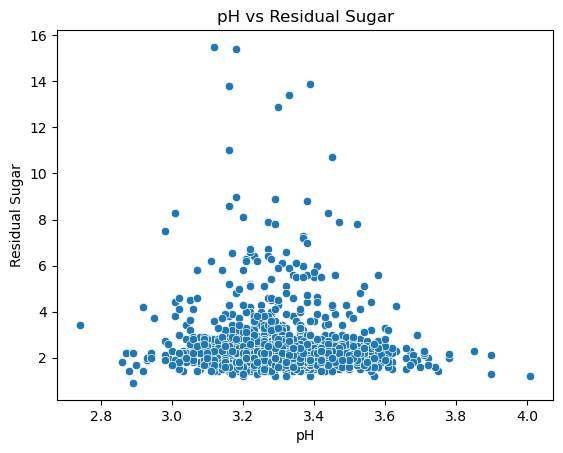

In [15]:
sns.scatterplot(x = df['pH'], y = df['residual sugar'])
plt.title('pH vs Residual Sugar')
plt.xlabel('pH')
plt.ylabel('Residual Sugar')
plt.show()

There doesn't seem be a relationship between sugar and pH. Most of the data is clustered around same area suggesting that these two variables have very little variability. The lack of a relationship between the two attributes can also be backed up by the correlation matrix from task 2 where we can see that the correlation between the two is very low.

### Task 4

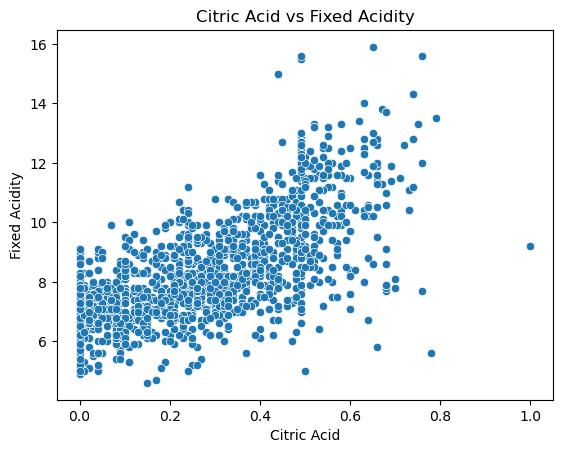

In [16]:
sns.scatterplot(x = df['citric acid'], y = df['fixed acidity'])
plt.title('Citric Acid vs Fixed Acidity')
plt.xlabel('Citric Acid')
plt.ylabel('Fixed Acidity')
plt.show()

We can see a clear strong positive relationship between Citric Acid and Fixed Acidity. This suggests that these two attributes are highly correlated and could be used to predict each other or can be used alternatively when predicting the quality. This again is backed by the correlation matrix from task 3.

### Task 5

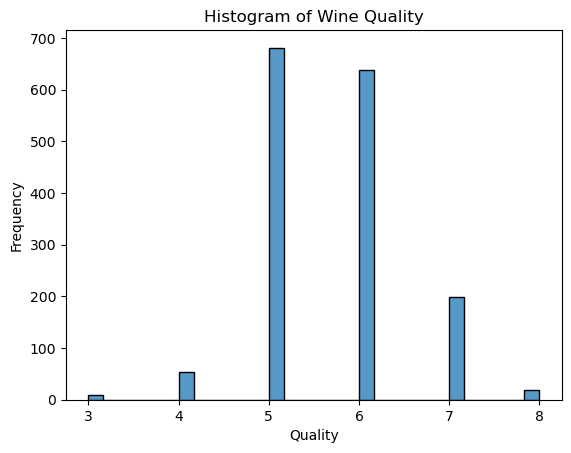

In [17]:
sns.histplot(df['quality'])
plt.title('Histogram of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

From the histogram we can see that most of the wines are good quality (denoted by quality from range 5 to 7) and is unimodal roughly resembling a bell curve. Very few of the wines are of bad or very good quality, we can infer from this that a wine of very good quality is very rare and wines of poor quality also seem to be relatively uncommon as well. It would be explain the higher costs of some wines that can be seen as it seems like it's exceptionally rare for wines to be considered of very good quality which can drive up the costs of those wines.

### Task 6

In [18]:
# create new column 'quality_category' based on 'quality' scores
def get_quality_category(quality):
    if quality <= 4:
        return 'Bad'
    elif quality <= 6:
        return 'Good'
    else:
        return 'Very Good'
    
df['quality_category'] = df['quality'].apply(get_quality_category)

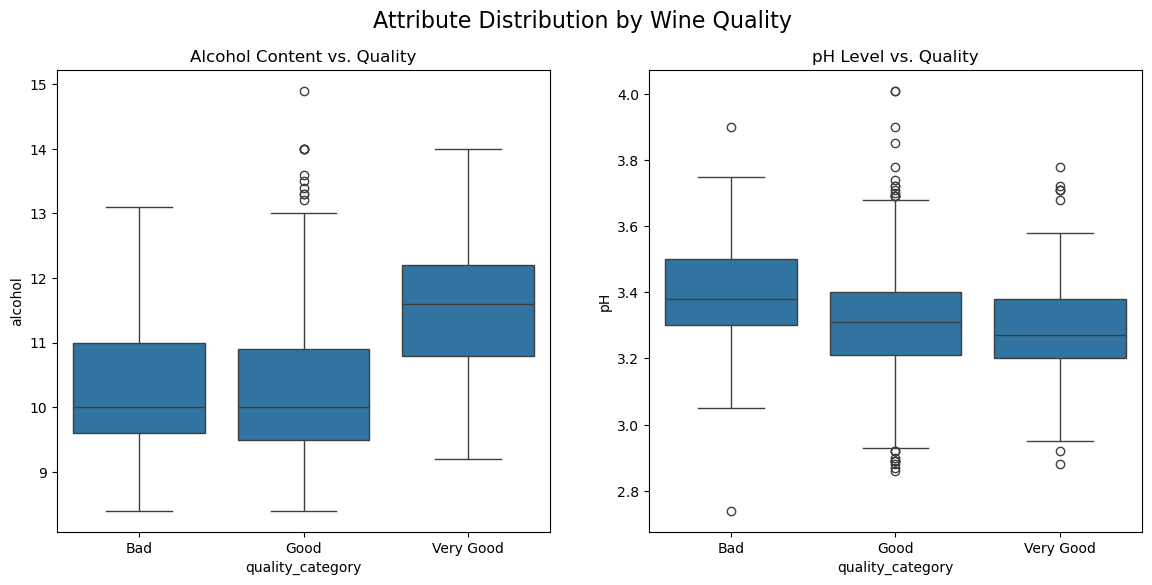

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Attribute Distribution by Wine Quality', fontsize=16)


sns.boxplot(ax=axes[0], x='quality_category', y='alcohol', data=df,
            order=['Bad', 'Good', 'Very Good']) 
axes[0].set_title('Alcohol Content vs. Quality')

sns.boxplot(ax=axes[1], x='quality_category', y='pH', data=df,
            order=['Bad', 'Good', 'Very Good'])
axes[1].set_title('pH Level vs. Quality')

plt.show()


From this we can see that the alcohol content between the bad and good wines are very similar with them having similar median, max and min values. The good quality wines do have outliers on the higher end of the range and also the very good wines have a much higher alcohol content as compared to the other two qualities suggesting that alcohol content could potentially be used to identify very good wines and also be a good predictor for the quality in general. For the box plot for the pH level we can clearly see that as the quality goes up the pH level goes down. Each step up in quality has lower min, max and median for the pH level than the one before. This would suggest pH level could be a good predictor for the quality of the wine but there is a lot of overlap in values for it which could make it not as good of a predictor. We can look at other attributes that are heavily correlated with the pH attribute and compare that to the quality to see if there's less overlap and use that attribute instead.

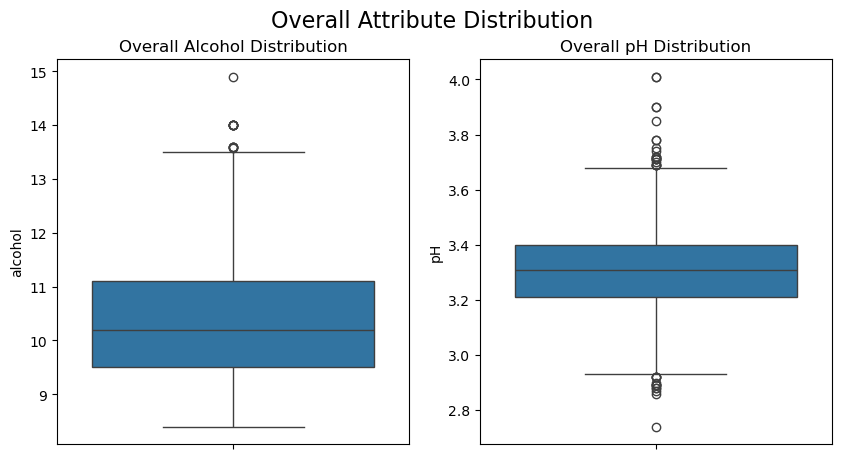

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Overall Attribute Distribution', fontsize=16)

# Overall box plot for Alcohol
sns.boxplot(ax=axes[0], y='alcohol', data=df)
axes[0].set_title('Overall Alcohol Distribution')

# Overall box plot for pH
sns.boxplot(ax=axes[1], y='pH', data=df)
axes[1].set_title('Overall pH Distribution')

plt.show()

From these plots we can see that the overall distribution for the alcohol level is moderately spread apart and doesn't contain many outliers. The distribution for the pH level however is much more compact with outliers on either end (both beyond the max and beyond the min) suggesting a general similarity in pH level among the wines.

### Task 7

From the exploration we've done we have found that the quality of the wines on average falls under the good quality with very good quality wines being exceptionally rare. This finding is very important as it can help us understang the pricing of wines better as rarity of a commodity almost always correlates to the price of it. We also found a handful of pairs of attributes that are highly correlated to each other. This finding can help us reduce the amount of predictors we have to use as some of them could be telling the same story. We also that the alcohol quality seems to be the only attribute that has strong correlation with the quality of the wine. We can use this information to then add in predictors that are correlated with the alcohol content when trying to predict the quality of the wine.